In [36]:
import sys
import time
import datetime as dt
from datetime import datetime
import urllib
# Number manipulation
import numpy as np


# Structure manipulation
import pandas as pd
from pandas import Series, DataFrame
from pandas.tools.plotting import scatter_matrix


# Graphing 
import seaborn as sb

import matplotlib.pyplot as plt
from matplotlib import rcParams


# Stats
import scipy as sp
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency


# Machine Learning & Preprocessing Package
import sklearn
import sklearn.metrics as sm
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LassoLarsCV
from sklearn.linear_model import LassoLarsIC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import metrics
from sklearn import tree
from sklearn.cluster import DBSCAN
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cross_validation import train_test_split

import statsmodels.api as sm
import statsmodels.formula.api as smf

from collections import Counter

import networkx as nx



# Parameters for graphs
%matplotlib inline
rcParams['figure.figsize'] = 10,10
sb.set_style('whitegrid')


# Mac
#x = pd.read_csv('/Users/magicsoccer10/Dropbox/twerk werk/Property Value/07-17.csv')

# Arch
#x = pd.read_csv('C:/Users/scott/Dropbox/twerk werk/Data/cre_values')

# Work
df1 = pd.read_csv('C:/Users/sstandring/Dropbox/twerk werk/Data/cre_values.csv')
df1 = df1.dropna(axis = 0)

df2 = pd.read_csv('C:/Users/sstandring/Dropbox/twerk werk/Data/SFprops_cap.csv')
df2 = df2.dropna(axis = 0)
df2.head()

,Property: Property Name,Prop City,Prop County,Last Sale,Last Price,Est. Sale Cap,Units,# 1 Bedrooms,# 2 Bedrooms,# 3 Bedrooms,Square Footage,Year Built,Prop Zip Code
0,1740 35th Ave,Oakland,Alameda,2/11/2013,305000,14.86,5,1,1,0,2857,1940.0,94601.0
1,8500 International Blvd,Oakland,Alameda,8/29/2014,797000,14.79,13,5,5,0,6904,1933.0,94621.0
2,510 N 2nd St,San Jose,Santa Clara,4/9/2015,770000,14.72,9,9,0,0,2685,1907.0,95112.0
4,1134-1142 International Blvd,Oakland,Alameda,10/14/2013,420000,14.68,6,2,4,0,3820,1906.0,94606.0
5,833-881 Jamestown Ave,San Francisco,San Francisco,11/30/2012,29000000,14.65,121,35,35,35,104000,2013.0,94124.0


In [37]:
df1 = df1.loc[df1['PropertyType'] == 'Multi-Family']
df1 = df1.loc[df1['Sale Date'] != '2007']
df1 = df1.loc[df1['Sale Date'] != '2008']
df1 = df1.loc[df1['Sale Date'] != '2009']
df1 = df1.loc[df1['Sale Date'] != '2010']
df1 = df1.loc[df1['Sale Date'] != '2011']



## Labeling and editing DataFrame_1

In [38]:
num = LabelEncoder()
df1_x = pd.DataFrame()
#df1_x['date'] = df1['Sale Date'].astype('str')
df1_x['year'] = df1['Year Built'].astype('str').str[:-3]
df1_x['cap'] = df1['Cap_Rate']
df1_x['units'] = df1['Number Of Units']
df1_x['sqft'] = df1['Bldg SF']
#df1_x['city'] = df1['Property City']
df1_x['zipper'] = df1['Property Zip Code']
df1_x['year'] = df1_x['year'].astype(int)
df1_x.zipper = df1_x.zipper.astype('str').str[:-1]
df1_x.zipper = df1_x['zipper'].astype('str')
df1_x['price'] = df1['Sale_Price']



df1_x.count()


year      3910
cap       3910
units     3910
sqft      3910
zipper    3910
price     3910
dtype: int64

## Labeling and editing DataFrame_2

In [39]:
df2_x = pd.DataFrame()
#df2_x['date'] = df2['Last Sale'].astype('str')
df2_x['year'] = df2['Year Built'].astype('str').str[:-3]
df2_x['cap'] = df2['Est. Sale Cap']
df2_x['units'] =df2['Units']
df2_x['sqft'] = df2['Square Footage']
#df2_x['county'] = df2['Prop County']
#df2_x['city'] = df2['Prop City']
df2_x['zipper'] = df2['Prop Zip Code']
df2_x['year'] = df2_x['year'].astype(int)
df2_x.zipper = df2_x.zipper.astype('str').str[:-3]
df2_x.zipper = df2_x['zipper'].astype('str')
df2_x['price'] = df2['Last Price']
df2_x = df2_x.loc[df2_x['zipper'] != '9520']
df2_x = df2_x.loc[df2_x['zipper'] != '9542']
df2_x = df2_x.loc[df2_x['zipper'] != '9540']
df2_x = df2_x.loc[df2_x['zipper'] != '9549']
df2_x = df2_x.loc[df2_x['zipper'] != '9502']
df2_x = df2_x.loc[df2_x['zipper'] != '9495']
df2_x = df2_x.loc[df2_x['zipper'] != '9544']
df2_x = df2_x.loc[df2_x['zipper'] != '9547']
df2_x = df2_x.loc[df2_x['zipper'] != '9568']
df2_x = df2_x.loc[df2_x['zipper'] != '9562']
df2_x = df2_x.loc[df2_x['zipper'] != '9462']
df2_x = df2_x.loc[df2_x['zipper'] != '9456']
df2_x = df2_x.loc[df2_x['zipper'] != '9458']
df2_x.count()

year      1569
cap       1569
units     1569
sqft      1569
zipper    1569
price     1569
dtype: int64

In [40]:
low = .05
high = .95
low = df2_x.price.quantile(low)
high = df2_x.price.quantile(high)
df2_x = df2_x.loc[df2_x.price < high]
df2_x = df2_x.loc[df2_x.price > low]

In [41]:
mean = np.mean(df2_x.price)
df1_lower = df1_x.loc[df1_x.price < mean]
df1_upper = df1_x.loc[df1_x.price > mean]
df2_lower = df2_x.loc[df2_x.price < mean]
df2_upper = df2_x.loc[df2_x.price > mean]


In [42]:
low = .05
high = .95
low = df1_lower.price.quantile(low)
high = df1_lower.price.quantile(high)
df1_lower = df1_lower.loc[df1_lower.price < high]
df1_lower = df1_lower.loc[df1_lower.price > low]

low = .05
high = .95
low = df2_lower.price.quantile(low)
high = df2_lower.price.quantile(high)
df2_lower = df2_lower.loc[df2_lower.price < high]
df2_lower = df2_lower.loc[df2_lower.price > low]

low = .05
high = .95
low = df1_upper.price.quantile(low)
high = df1_upper.price.quantile(high)
df1_upper = df1_upper.loc[df1_upper.price < high]
df1_upper = df1_upper.loc[df1_upper.price > low]

low = .05
high = .95
low = df2_upper.price.quantile(low)
high = df2_upper.price.quantile(high)
df2_upper = df2_upper.loc[df2_upper.price < high]
df2_upper = df2_upper.loc[df2_upper.price > low]


In [43]:
est = smf.ols(formula = 'np.log(price) ~ (cap + (np.log(units)/np.log(sqft)) + year) * C(zipper)', data = df1_lower)
results = est.fit()
prediction = results.predict(df2_lower)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     26.24
Date:                Tue, 20 Jun 2017   Prob (F-statistic):               0.00
Time:                        12:23:06   Log-Likelihood:                -281.41
No. Observations:                2751   AIC:                             974.8
Df Residuals:                    2545   BIC:                             2194.
Df Model:                         205                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------

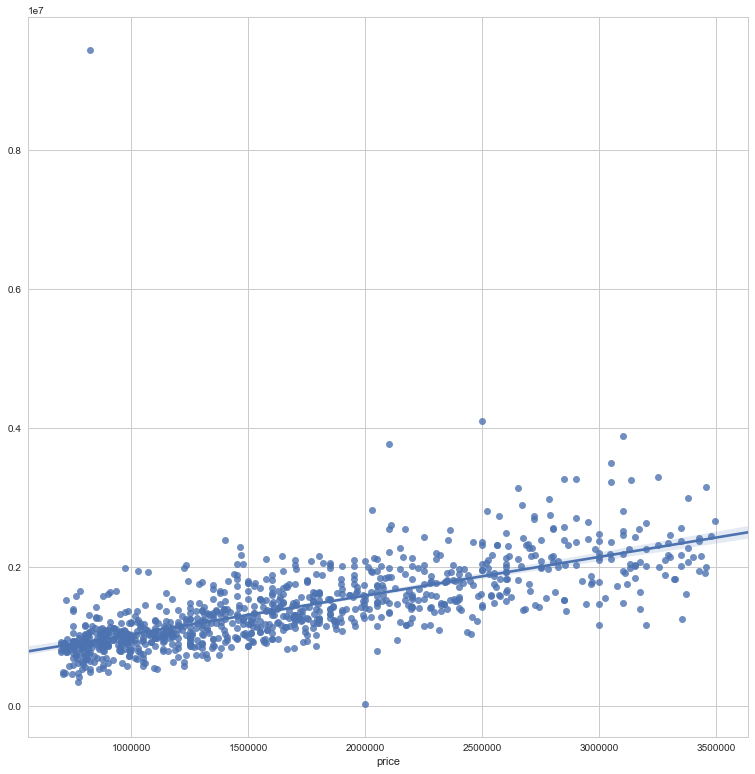

In [44]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1,1])
sb.regplot(df2_lower.price, np.exp(prediction),scatter=True)

In [45]:
a = pd.DataFrame({'cap':[3.4],'units':[6], 'sqft':[3750],'year':[196], 'zipper':['9454']})
ans = results.predict(a)
price = np.exp(ans).astype(int)
ppsf = price/a.sqft
print('Price: ')
print(price)
print('Price per SQFT: ')
print(ppsf.values)

Price: 
[1224318]
Price per SQFT: 
[ 326.4848]


In [46]:
df2_upper = df2_upper.loc[df2_upper['zipper'] != '9503']

In [47]:
est = smf.ols(formula = 'np.log(price) ~ (cap + (np.log(units)/np.log(sqft)) + year) * C(zipper)', data = df1_upper)
results = est.fit()
prediction = results.predict(df2_upper)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     22.28
Date:                Tue, 20 Jun 2017   Prob (F-statistic):          8.81e-179
Time:                        12:23:06   Log-Likelihood:                 3.2819
No. Observations:                 762   AIC:                             367.4
Df Residuals:                     575   BIC:                             1234.
Df Model:                         186                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------

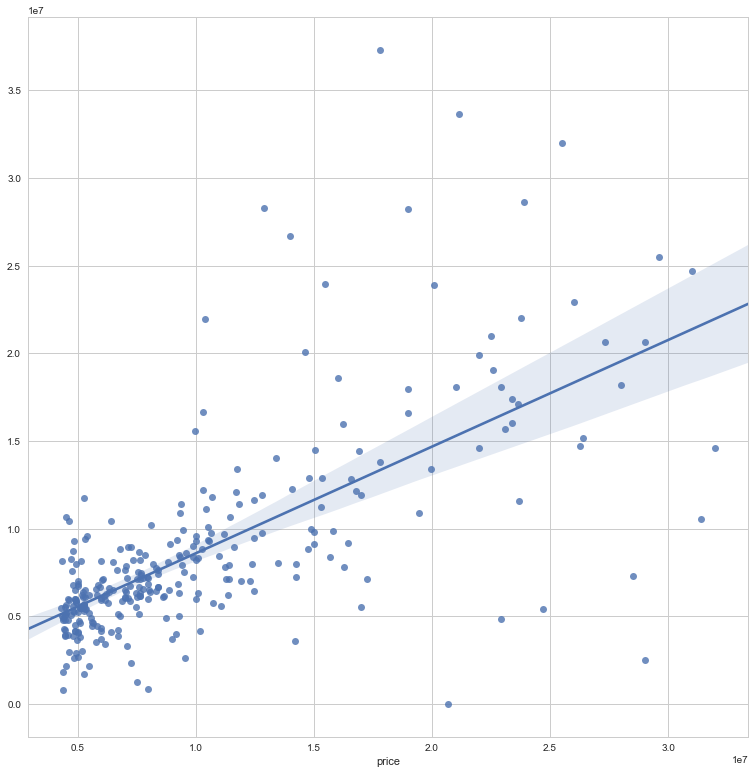

In [48]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1,1])
sb.regplot(df2_upper.price, np.exp(prediction),scatter=True)

In [49]:
a = pd.DataFrame({'cap':[5],'units':[30], 'sqft':[25000],'year':[196], 'zipper':['9454']})
ans = results.predict(a)
price = np.exp(ans).astype(int)
ppsf = price/a.sqft
print('Price: ')
print(price)
print('Price per SQFT: ')
print(ppsf.values)

Price: 
[5836573]
Price per SQFT: 
[ 233.46292]
